In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')


### Dataset
We have two datasets, one for training called `fraudTrain` and one for testing called `fraudTest`. The train set consists of 1,296,675 transactions and the test one consists of 555,719 transactions.

In [2]:
df = pd.read_csv('./data/fraudTrain.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df_test = pd.read_csv("data/fraudTest.csv")

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## EDA - Exploratory Data Analysis

We are going to perform EDA only on train set and not touch the test set.

### Step 1: Basic Data Cleaning.

In [6]:
# Checking for nulls.
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# Checking for duplicates.
df.duplicated().sum()

0

As we can see from above, the data is pretty clean. As it doesn't have any nulls or duplicates. 

If there were nulls or duplicates present, the duplicates would have been removed and the nulls values would have been either populated with necessary values abiding by business importance or be removed if they are insignificant.

### Step 2: Descriptive Statistics

In [8]:
# Numerical columns: 'amt', 'lat', 'long', 'city_pop'
numerical_columns = ['amt', 'lat', 'long', 'city_pop']

# Compute summary statistics
summary_stats = df[numerical_columns].describe()

# Print summary statistics
print(summary_stats)

                amt           lat          long      city_pop
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06
mean   7.035104e+01  3.853762e+01 -9.022634e+01  8.882444e+04
std    1.603160e+02  5.075808e+00  1.375908e+01  3.019564e+05
min    1.000000e+00  2.002710e+01 -1.656723e+02  2.300000e+01
25%    9.650000e+00  3.462050e+01 -9.679800e+01  7.430000e+02
50%    4.752000e+01  3.935430e+01 -8.747690e+01  2.456000e+03
75%    8.314000e+01  4.194040e+01 -8.015800e+01  2.032800e+04
max    2.894890e+04  6.669330e+01 -6.795030e+01  2.906700e+06


In [9]:
# Categorical columns: 'category', 'gender', 'state', 'job'
categorical_columns = ['category', 'gender', 'state', 'job']

# Count unique values and their frequencies for each categorical column
unique_counts = {}
for col in categorical_columns:
    unique_counts[col] = df[col].value_counts()

# Print unique values and frequencies
for col, counts in unique_counts.items():
    print(f"Unique values for {col}:")
    print(counts)
    print()  # Empty line for clarity

Unique values for category:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

Unique values for gender:
gender
F    709863
M    586812
Name: count, dtype: int64

Unique values for state:
state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT 

### Step 3: Data Visualization

#### Step 3.1: Histograms for numerical columns

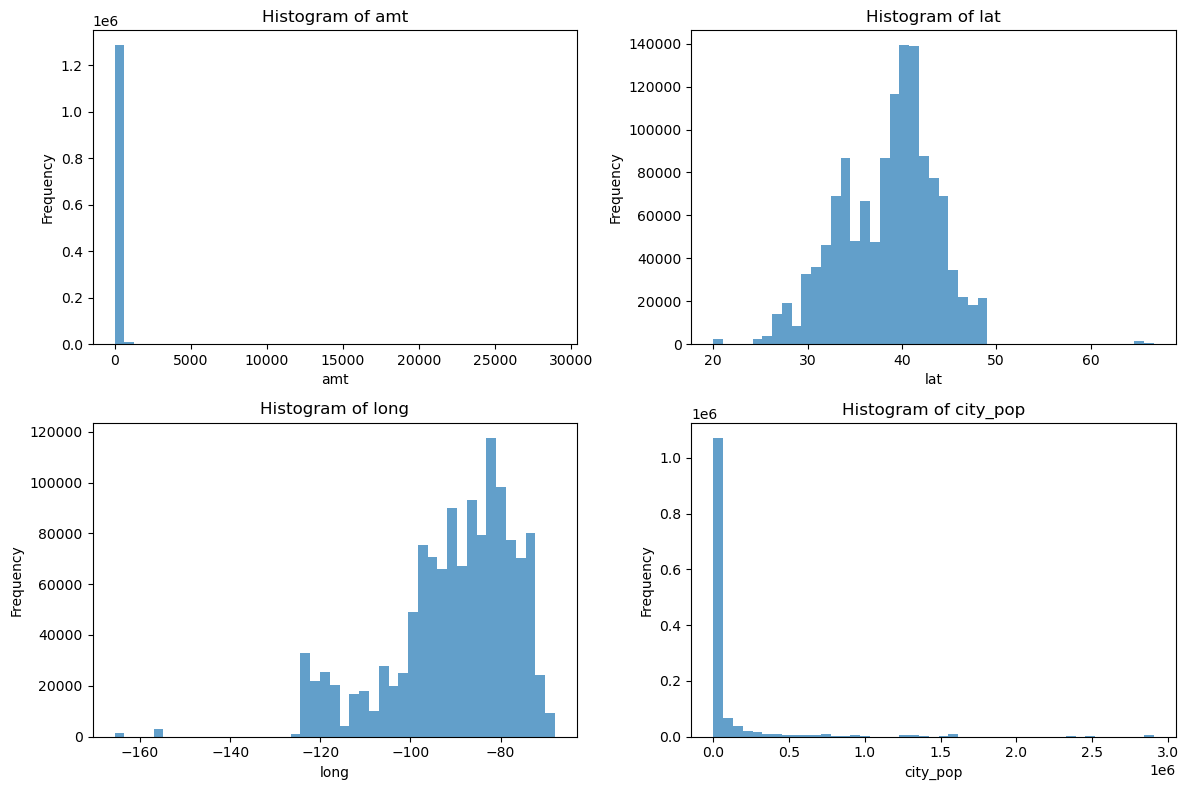

In [10]:
# Numerical columns for histograms
numerical_columns = ['amt', 'lat', 'long', 'city_pop']

# Create a figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axs[i]
    ax.hist(df[col], bins=45, alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The graphs above show that there is a significant Data skewness where the data is highly skewed towards lower values of transactions and lower values of populations. In order to understand more we need to perform additional analysis with other EDA Techniques such as statistical summaries, box plots etc.


#### Step 3.2: Box plots for numerical columns

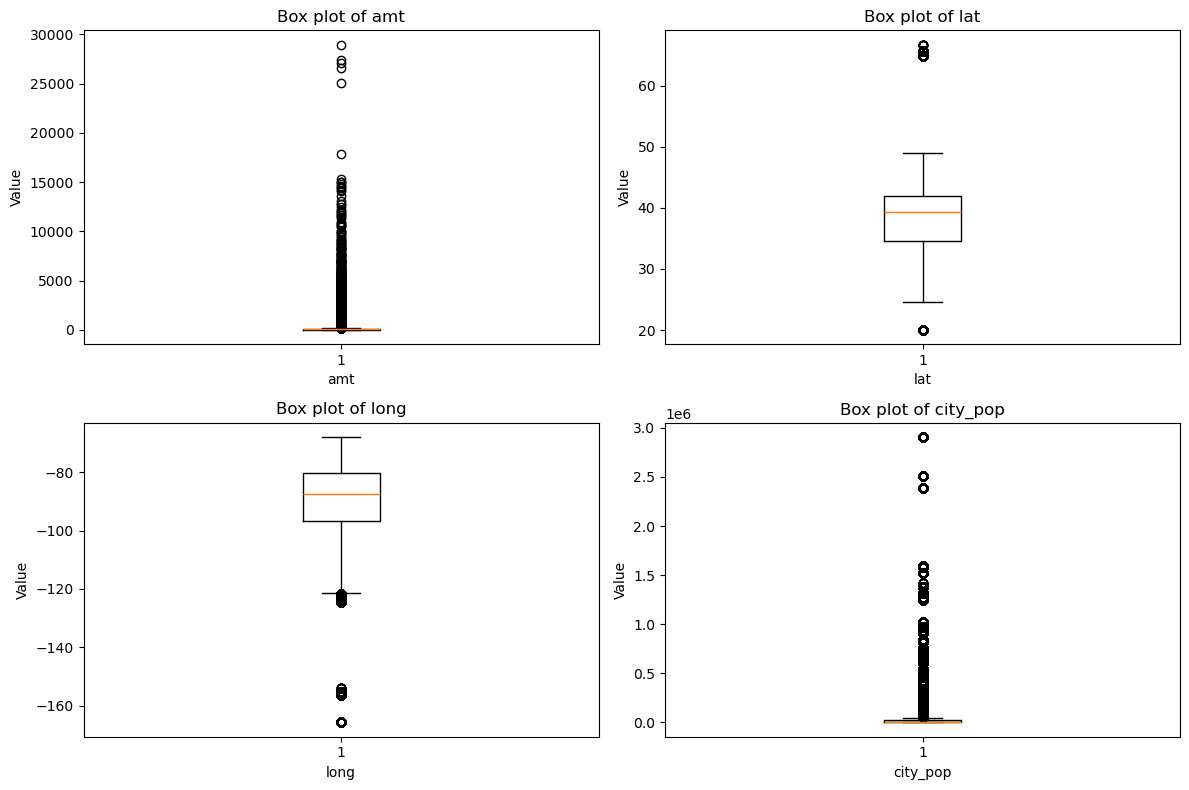

In [11]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axs[i]
    ax.boxplot(df[col])
    ax.set_title(f'Box plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Value')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

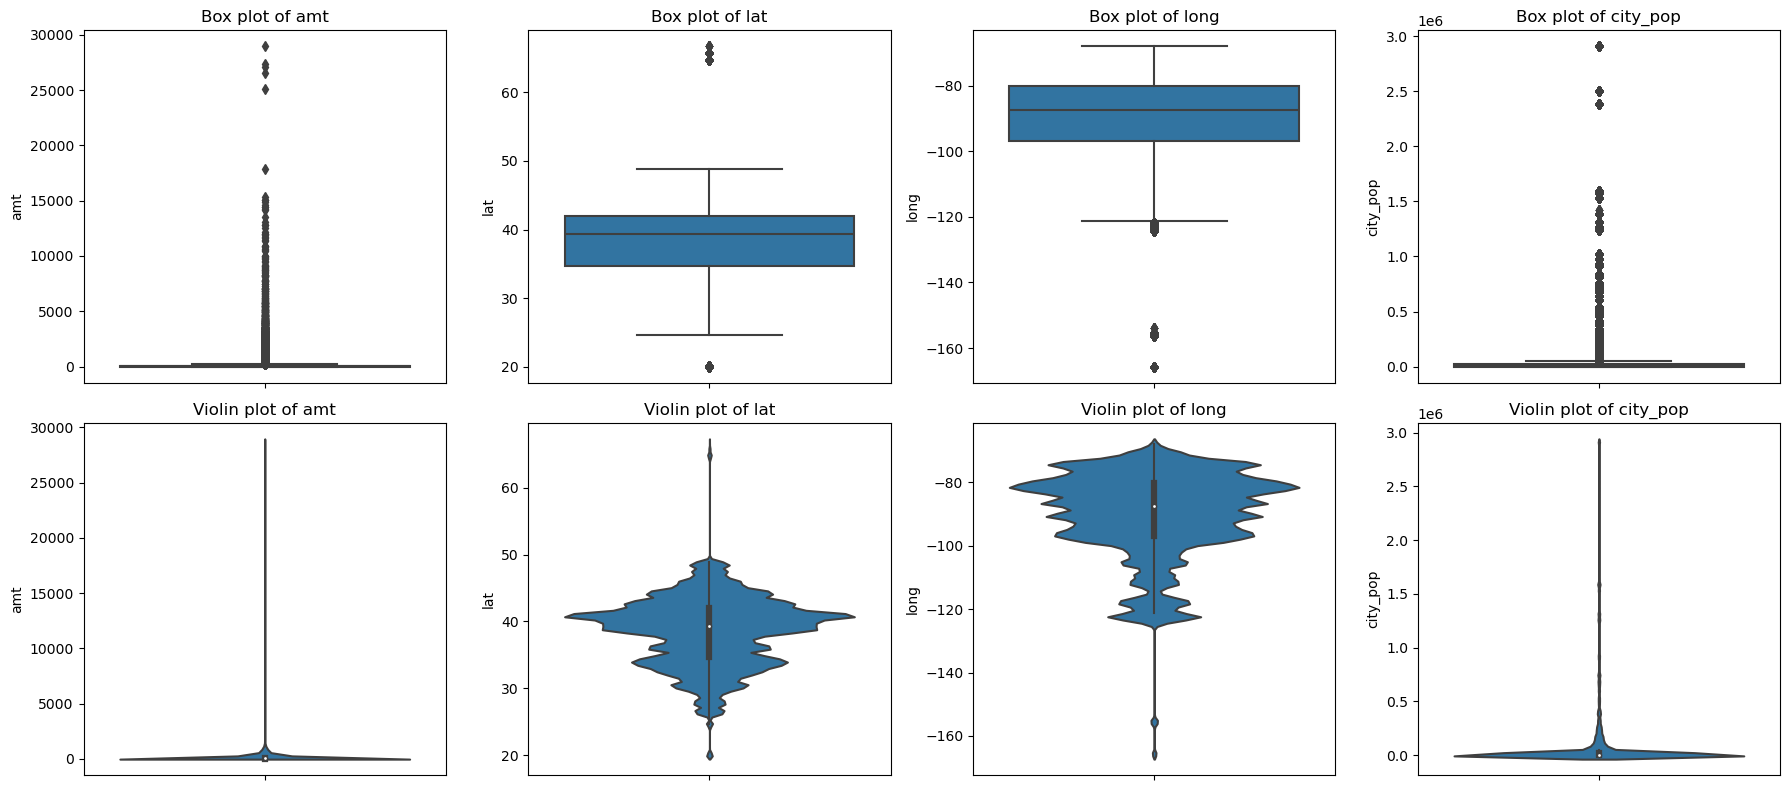

In [12]:
# Numerical columns for box and violin plots
numerical_columns = ['amt', 'lat', 'long', 'city_pop']

# Create a figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))

# Plot box plots and violin plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Box plot
    sns.boxplot(y=df[col], ax=axs[0, i])
    axs[0, i].set_title(f'Box plot of {col}')
    axs[0, i].set_ylabel(col)
    
    # Violin plot
    sns.violinplot(y=df[col], ax=axs[1, i])
    axs[1, i].set_title(f'Violin plot of {col}')
    axs[1, i].set_ylabel(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### 3.3 Bar Plots for Categorical Columns

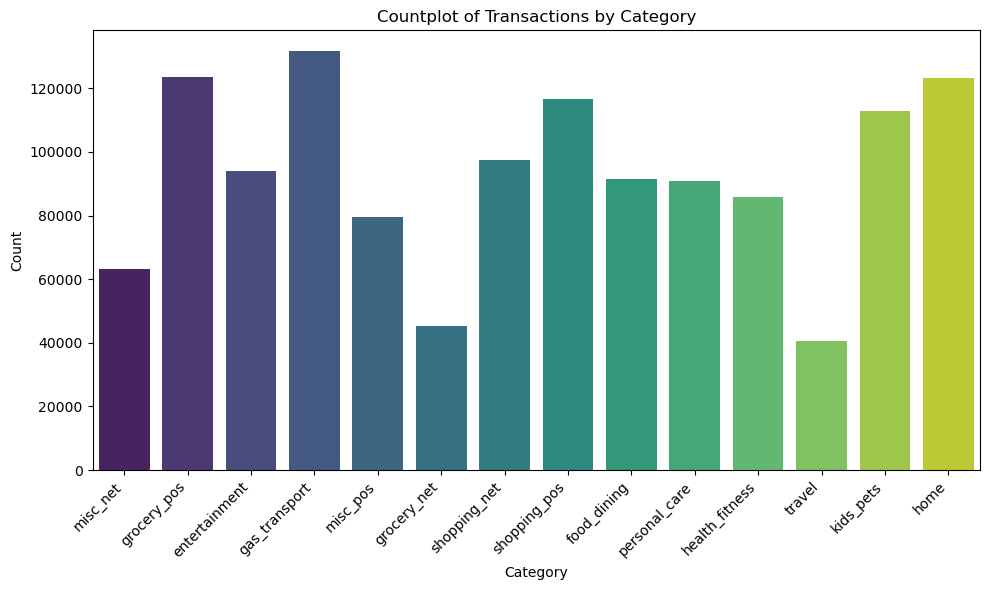

In [13]:
df['category'] = df['category'].astype(str)

# Create the countplot with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='category', data=df, palette='viridis')
ax.set_title('Countplot of Transactions by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

# Rotate x-axis ticks at a 45-degree angle for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

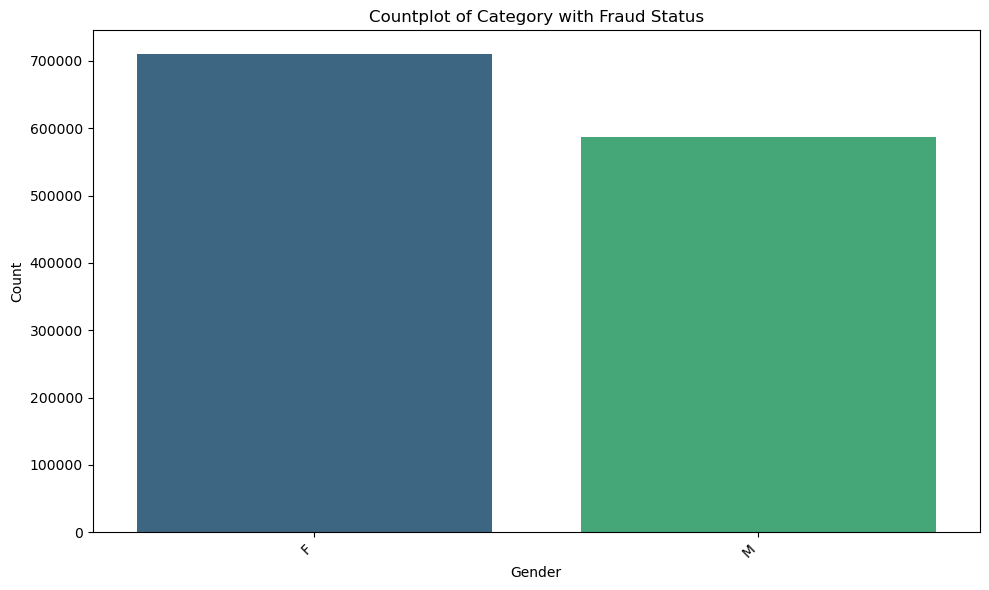

In [14]:
# Create the countplot with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', data=df, palette='viridis')
ax.set_title('Countplot of Category with Fraud Status')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Rotate x-axis ticks at a 45-degree angle for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

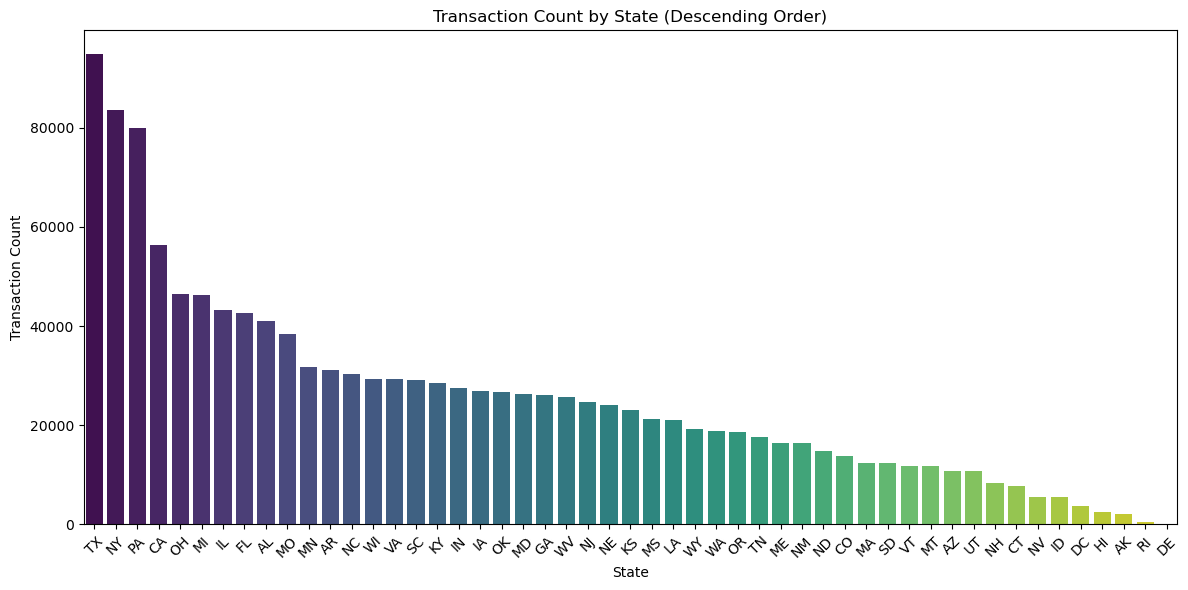

In [15]:
# Calculate the count of transactions by state
state_counts = df['state'].value_counts()

# Sort states based on transaction count (descending order)
sorted_states_desc = state_counts.sort_values(ascending=False)

# Create a count plot with seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df, order=sorted_states_desc.index, palette='viridis')
plt.title('Transaction Count by State (Descending Order)')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

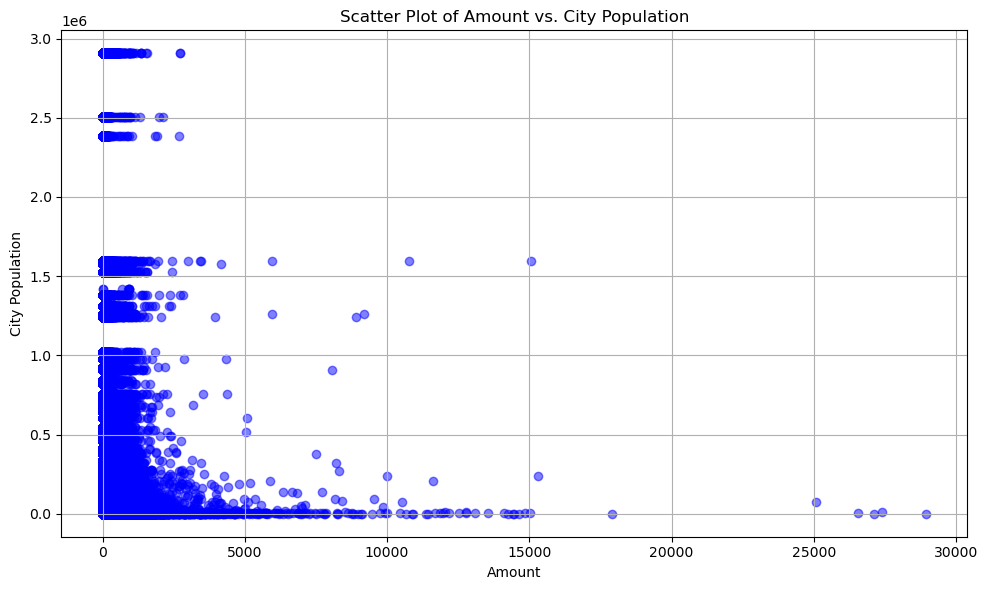

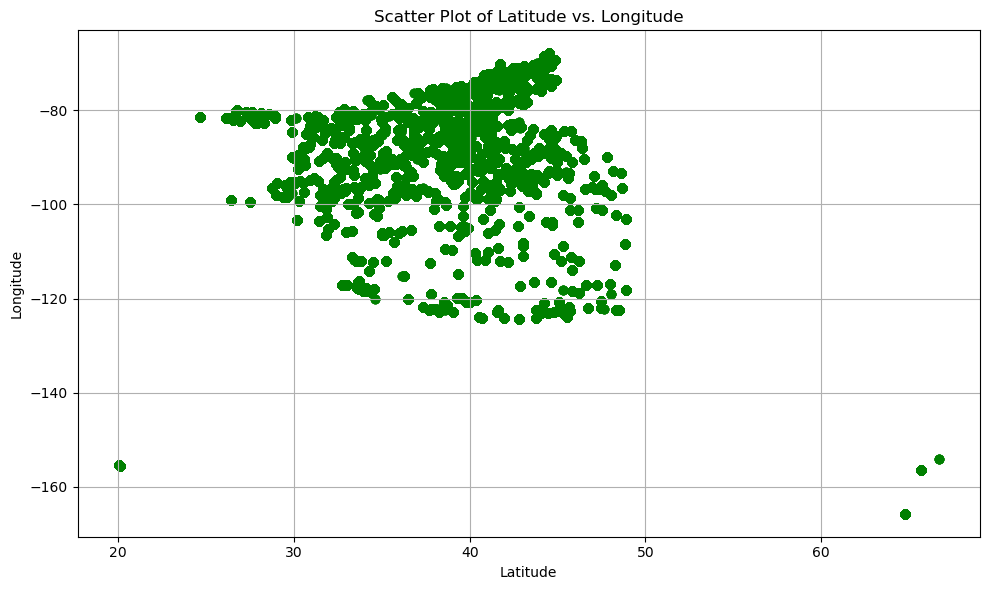

In [16]:
# Scatter plot of 'amt' vs. 'city_pop'

plt.figure(figsize=(10, 6))
plt.scatter(df['amt'], df['city_pop'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Amount vs. City Population')
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of 'lat' vs. 'long'
plt.figure(figsize=(10, 6))
plt.scatter(df['lat'], df['long'], alpha=0.5, c='green')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 4: Time Analysis

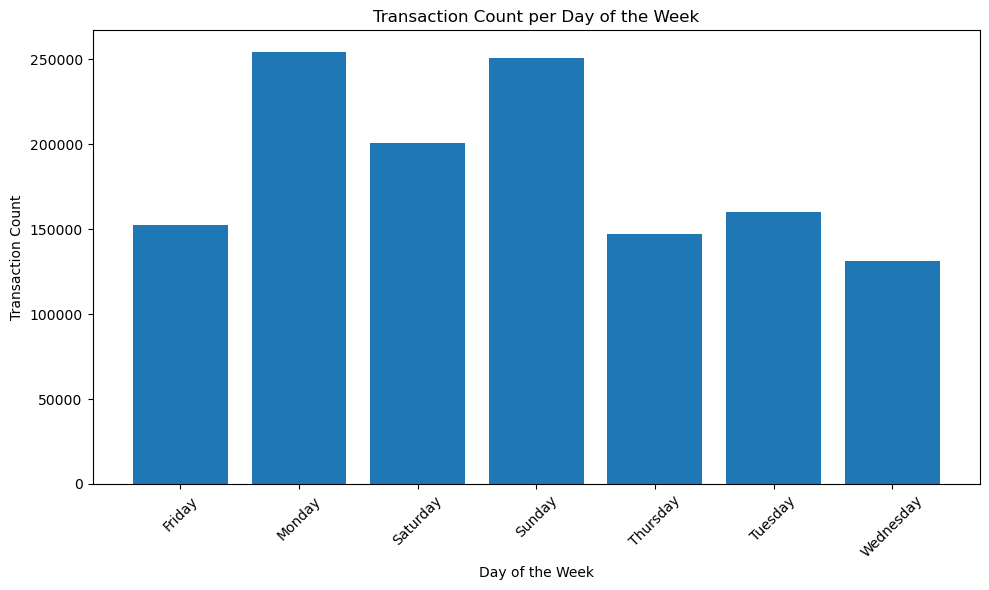

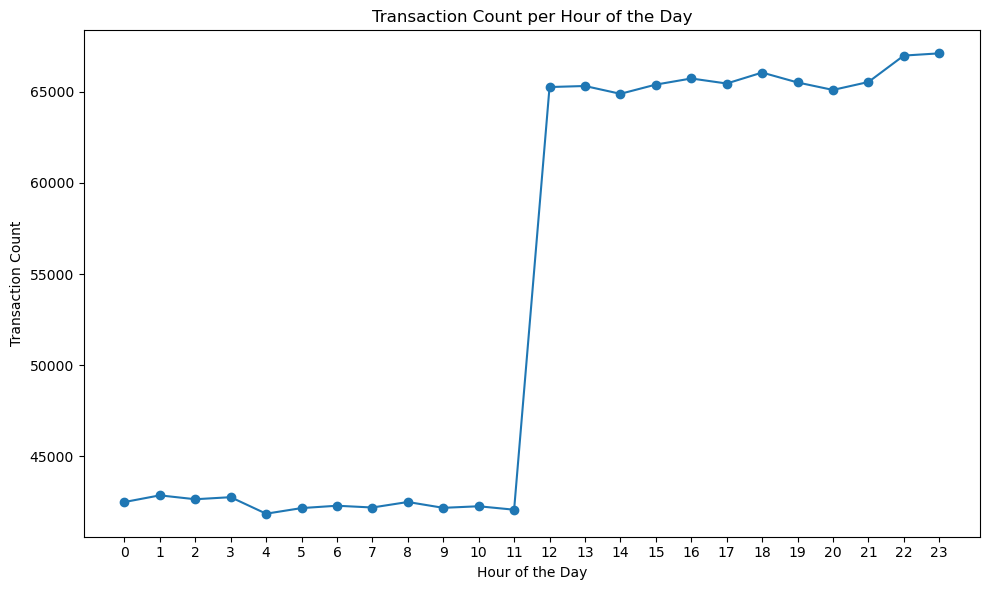

In [17]:
# Convert 'trans_date_trans_time' column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date features
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df['hour'] = df['trans_date_trans_time'].dt.hour

# Example: Analyze transaction count per day of the week
transaction_count_per_day = df.groupby('day_of_week').size().reset_index(name='transaction_count')

# Plot transaction count per day of the week
plt.figure(figsize=(10, 6))
plt.bar(transaction_count_per_day['day_of_week'], transaction_count_per_day['transaction_count'])
plt.title('Transaction Count per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Example: Analyze transaction count per hour of the day
transaction_count_per_hour = df.groupby('hour').size().reset_index(name='transaction_count')

# Plot transaction count per hour of the day
plt.figure(figsize=(10, 6))
plt.plot(transaction_count_per_hour['hour'], transaction_count_per_hour['transaction_count'], marker='o')
plt.title('Transaction Count per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.xticks(transaction_count_per_hour['hour'])
plt.tight_layout()
plt.show()

### Step 5: Fraud Analysis

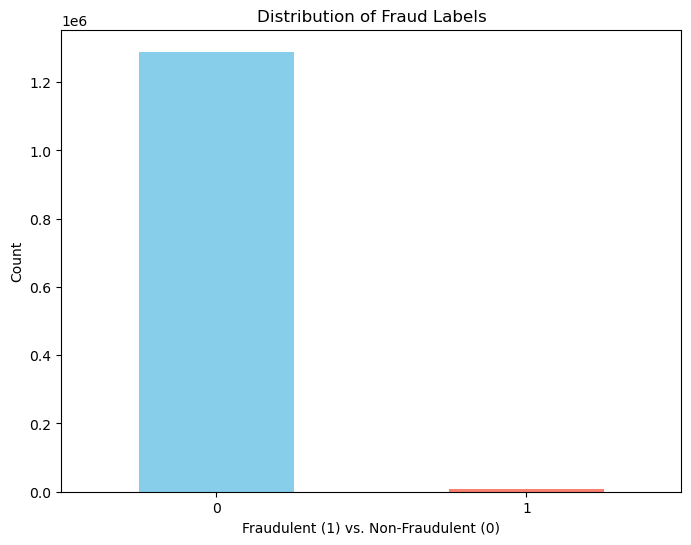

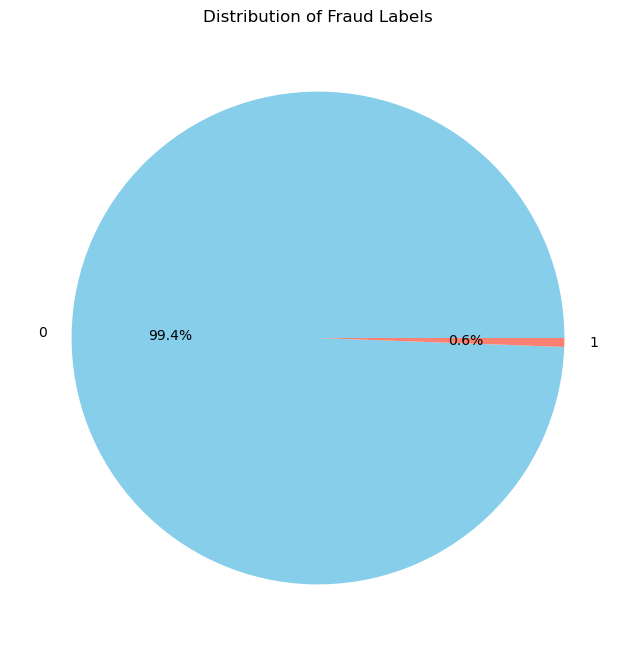

In [18]:
# Calculate the count of fraudulent and non-fraudulent transactions
fraud_counts = df['is_fraud'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraud Labels')
plt.xlabel('Fraudulent (1) vs. Non-Fraudulent (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraud Labels')
plt.show()

# Calculate the percentage of fraudulent transactions
fraud_percentage = fraud_counts[1] / len(df) * 100
non_fraud_percentage = fraud_counts[0] / len(df) * 100

As we can see from above, the data is highly imbalanced with only 0.6% of transactions to be fradulant among 1.2 million transactions

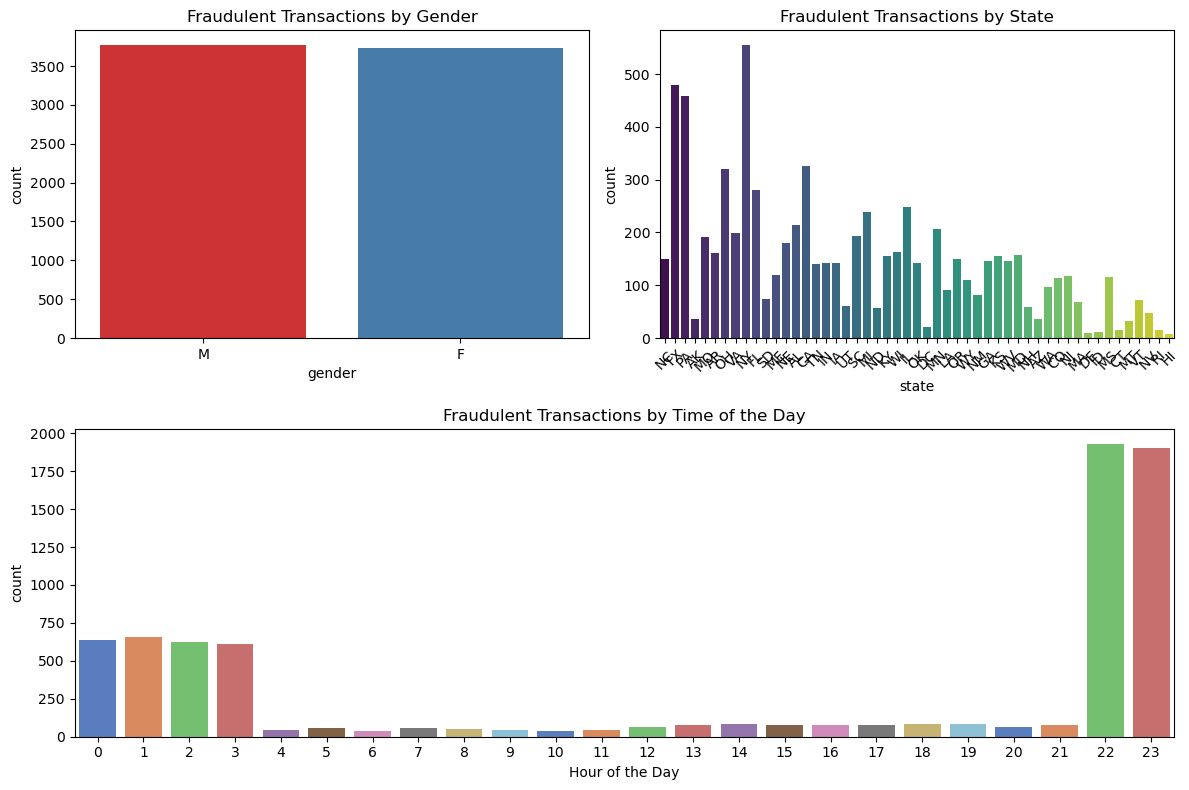

In [19]:
# Filter DataFrame for fraudulent transactions
fraudulent_df = df[df['is_fraud'] == 1]

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot 1: Determine fraud transactions by gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=fraudulent_df, palette='Set1')
plt.title('Fraudulent Transactions by Gender')

# Plot 2: Determine fraud transactions by state
plt.subplot(2, 2, 2)
sns.countplot(x='state', data=fraudulent_df, palette='viridis')
plt.title('Fraudulent Transactions by State')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Extract hour of the day from datetime column for time-based analysis
fraudulent_df['hour'] = fraudulent_df['trans_date_trans_time'].dt.hour

# Plot 3: Determine fraud transactions by time of the day
plt.subplot(2, 1, 2)
sns.countplot(x='hour', data=fraudulent_df, palette='muted')
plt.title('Fraudulent Transactions by Time of the Day')
plt.xlabel('Hour of the Day')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

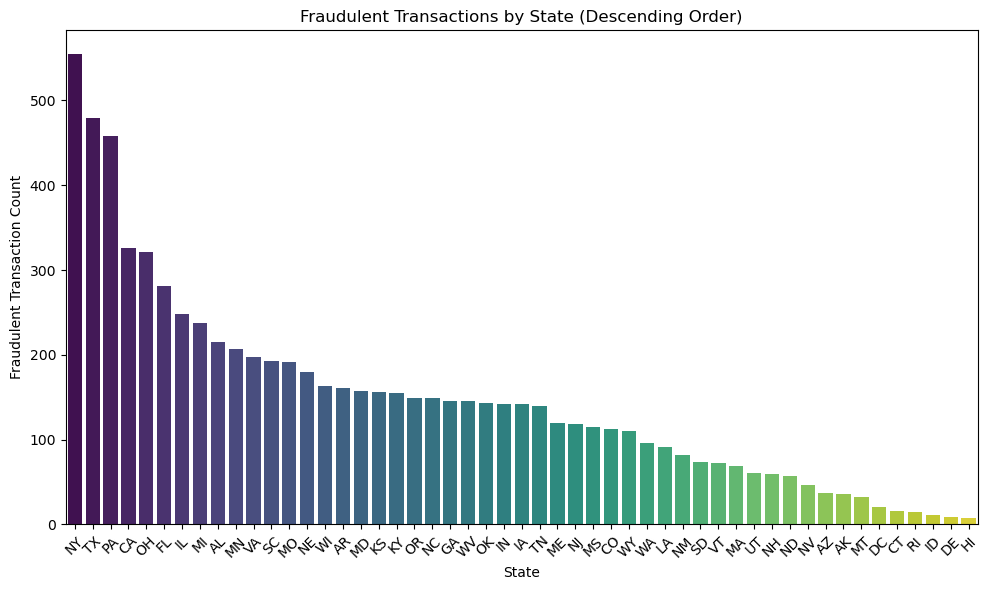

In [20]:
# Calculate the count of fraudulent transactions per state and sort in descending order
fraudulent_state_counts = fraudulent_df['state'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot fraudulent transactions by state in descending order
sns.countplot(x='state', data=fraudulent_df, order=fraudulent_state_counts.index, palette='viridis')
plt.title('Fraudulent Transactions by State (Descending Order)')
plt.xlabel('State')
plt.ylabel('Fraudulent Transaction Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

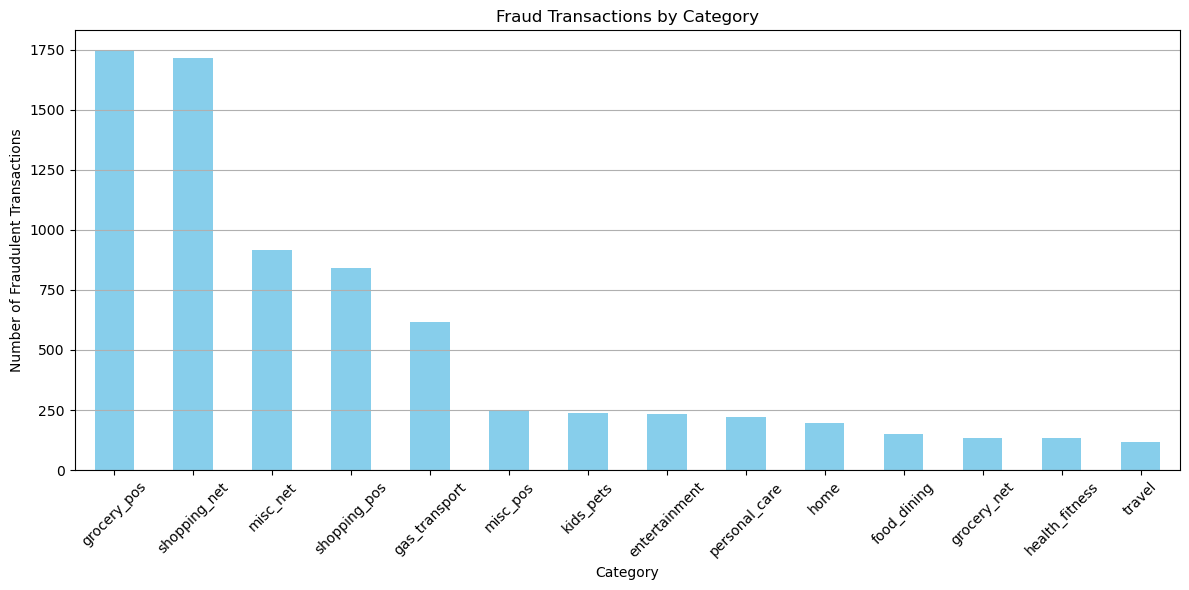

In [21]:
# Calculate the count of fraudulent transactions by category
fraudulent_category_counts = fraudulent_df['category'].value_counts()

# Plot bar graph of fraud transactions by category
plt.figure(figsize=(12, 6))
fraudulent_category_counts.plot(kind='bar', color='skyblue')
plt.title('Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines on y-axis for clarity
plt.tight_layout()
plt.show()

From the above graphs, we can notice that: 
1. Most fraud transactions appear to be happening in the middle of the night.
2. Fradulant transactions appear to be the highest in NY state followed by TX and PA. 
3. Other states have an average fraud rate with HI being the lowest.
4. Highest number of fraud transactions are in grocery_pos and shopping net

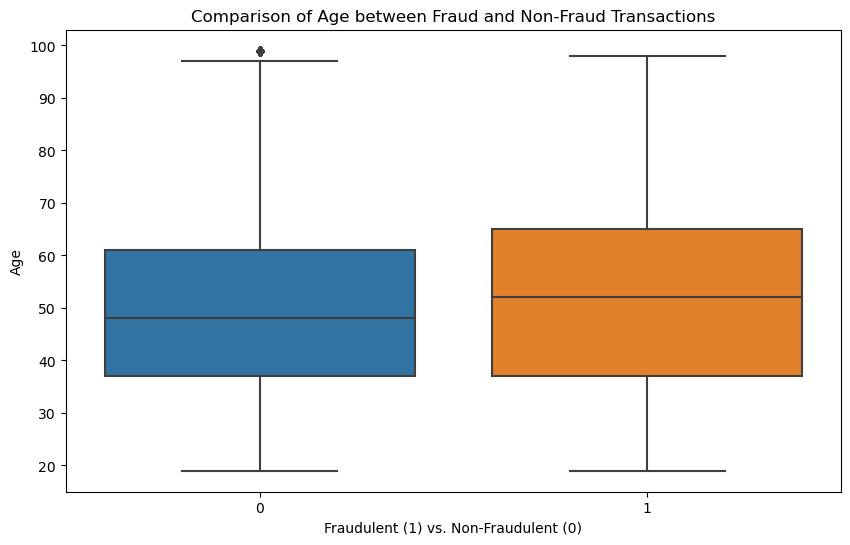

In [22]:
# Convert 'dob' column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age from date of birth
current_date = datetime.now()
df['age'] = (current_date - df['dob']).dt.days // 365  # Calculate age in years

# Analyze distribution of age for fraud vs. non-fraud transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Comparison of Age between Fraud and Non-Fraud Transactions')
plt.xlabel('Fraudulent (1) vs. Non-Fraudulent (0)')
plt.ylabel('Age')
plt.show()

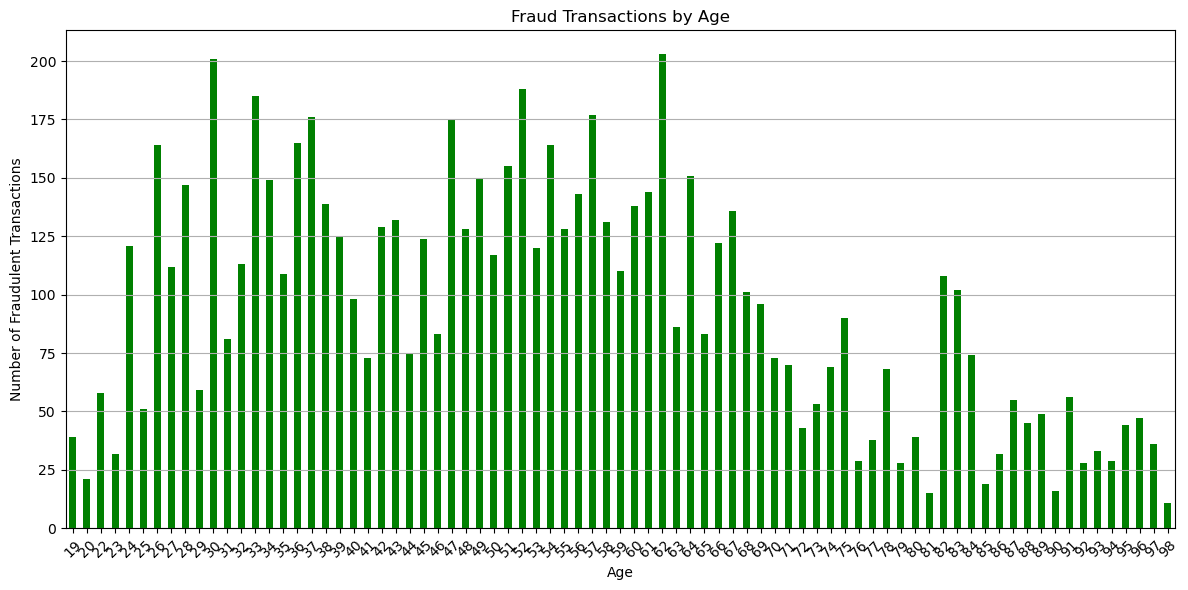

In [23]:
# Convert 'dob' column to datetime format
fraudulent_df['dob'] = pd.to_datetime(fraudulent_df['dob'])

# Calculate age from date of birth
current_date = datetime.now()
fraudulent_df['age'] = (current_date - fraudulent_df['dob']).dt.days // 365

# Calculate the count of fraudulent transactions by age
fraudulent_age_counts = fraudulent_df['age'].value_counts().sort_index()

# Plot bar graph of fraud transactions by age
plt.figure(figsize=(12, 6))
fraudulent_age_counts.plot(kind='bar', color='green')
plt.title('Fraud Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Step 6: Correlation analysis.

#### Step 6.1: Drop likely irrelevant columns

The majority of object columns that do not fit into categorical classifications are unlikely to significantly influence fraud detection based solely on their values. Thus, it is prudent to exclude these columns and focus on identifying correlations among potential contributing factors, as well as determining their relative importance in fraud detection analysis.

In [24]:
# Drop columns based on analysis and domain knowledge
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 
                   'city', 'zip', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']

# Drop the columns from the DataFrame
df_processed = df.drop(columns=columns_to_drop)

# Display the processed DataFrame
print(df_processed.head())

        category     amt gender state      lat      long  city_pop  \
0       misc_net    4.97      F    NC  36.0788  -81.1781      3495   
1    grocery_pos  107.23      F    WA  48.8878 -118.2105       149   
2  entertainment  220.11      M    ID  42.1808 -112.2620      4154   
3  gas_transport   45.00      M    MT  46.2306 -112.1138      1939   
4       misc_pos   41.96      M    VA  38.4207  -79.4629        99   

                                 job  is_fraud day_of_week  month  hour  age  
0          Psychologist, counselling         0     Tuesday      1     0   36  
1  Special educational needs teacher         0     Tuesday      1     0   45  
2        Nature conservation officer         0     Tuesday      1     0   62  
3                    Patent attorney         0     Tuesday      1     0   57  
4     Dance movement psychotherapist         0     Tuesday      1     0   38  


In [25]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  object 
 1   amt          1296675 non-null  float64
 2   gender       1296675 non-null  object 
 3   state        1296675 non-null  object 
 4   lat          1296675 non-null  float64
 5   long         1296675 non-null  float64
 6   city_pop     1296675 non-null  int64  
 7   job          1296675 non-null  object 
 8   is_fraud     1296675 non-null  int64  
 9   day_of_week  1296675 non-null  object 
 10  month        1296675 non-null  int32  
 11  hour         1296675 non-null  int32  
 12  age          1296675 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(5)
memory usage: 118.7+ MB


Feature Importance:
                Feature  Importance
0                   amt    0.433666
7      category_encoded    0.174494
5                  hour    0.122996
6                   age    0.064956
3              city_pop    0.039672
4                 month    0.027357
10          job_encoded    0.027249
2                  long    0.027058
1                   lat    0.026816
11  day_of_week_encoded    0.023339
9         state_encoded    0.018299
8        gender_encoded    0.014097


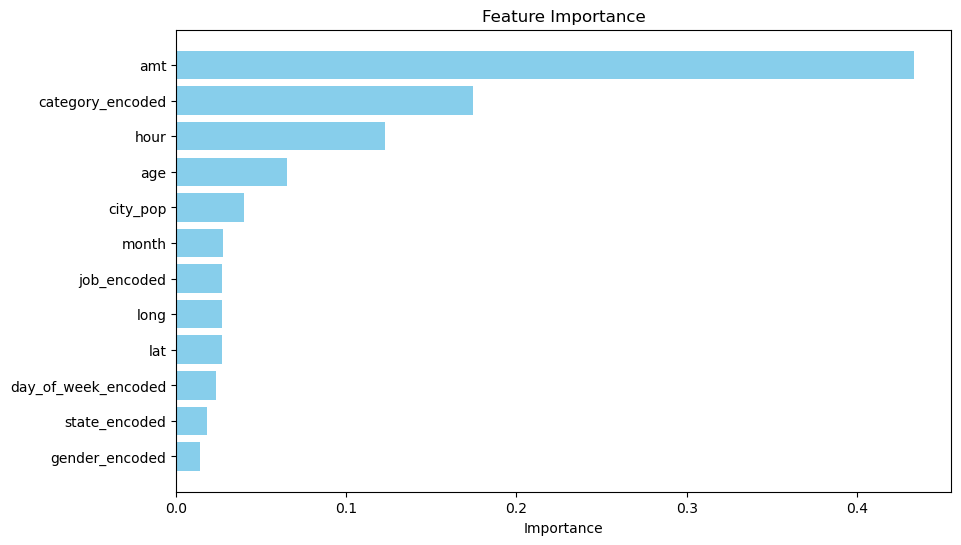

In [26]:
# Select necessary categorical columns for label encoding
categorical_columns = ['category', 'gender', 'state', 'job', 'day_of_week']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_processed[col + '_encoded'] = label_encoder.fit_transform(df_processed[col])

# Separate features and target variable
X = df_processed.drop(['is_fraud'] + categorical_columns, axis=1)  # Drop original categorical columns and target variable
y = df_processed['is_fraud']

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

The above graph shows that amount has significant importance when determining which transaction could be a fraud one. Followed by category, hour and age.

In [27]:
onlyNumerical = df_processed.drop(['category', 'gender', 'state','job', 'day_of_week' ], axis=1)

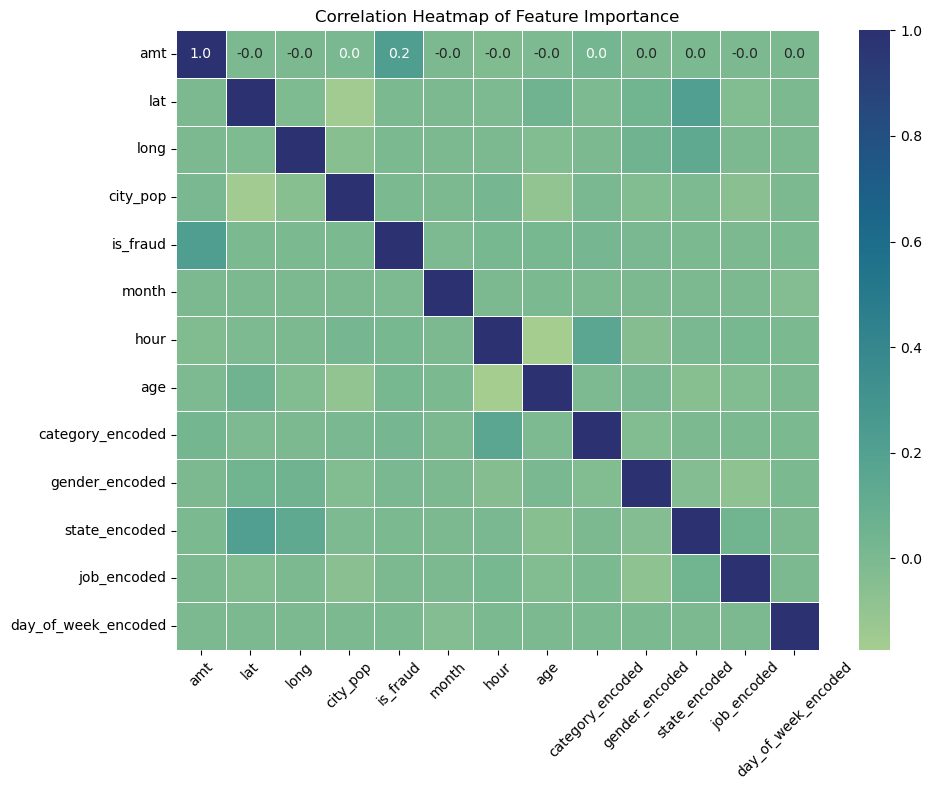

In [28]:
corr_matrix = onlyNumerical.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(onlyNumerical.corr(),annot=True,fmt='.1f',linewidth=.5,cmap="crest")
plt.title('Correlation Heatmap of Feature Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

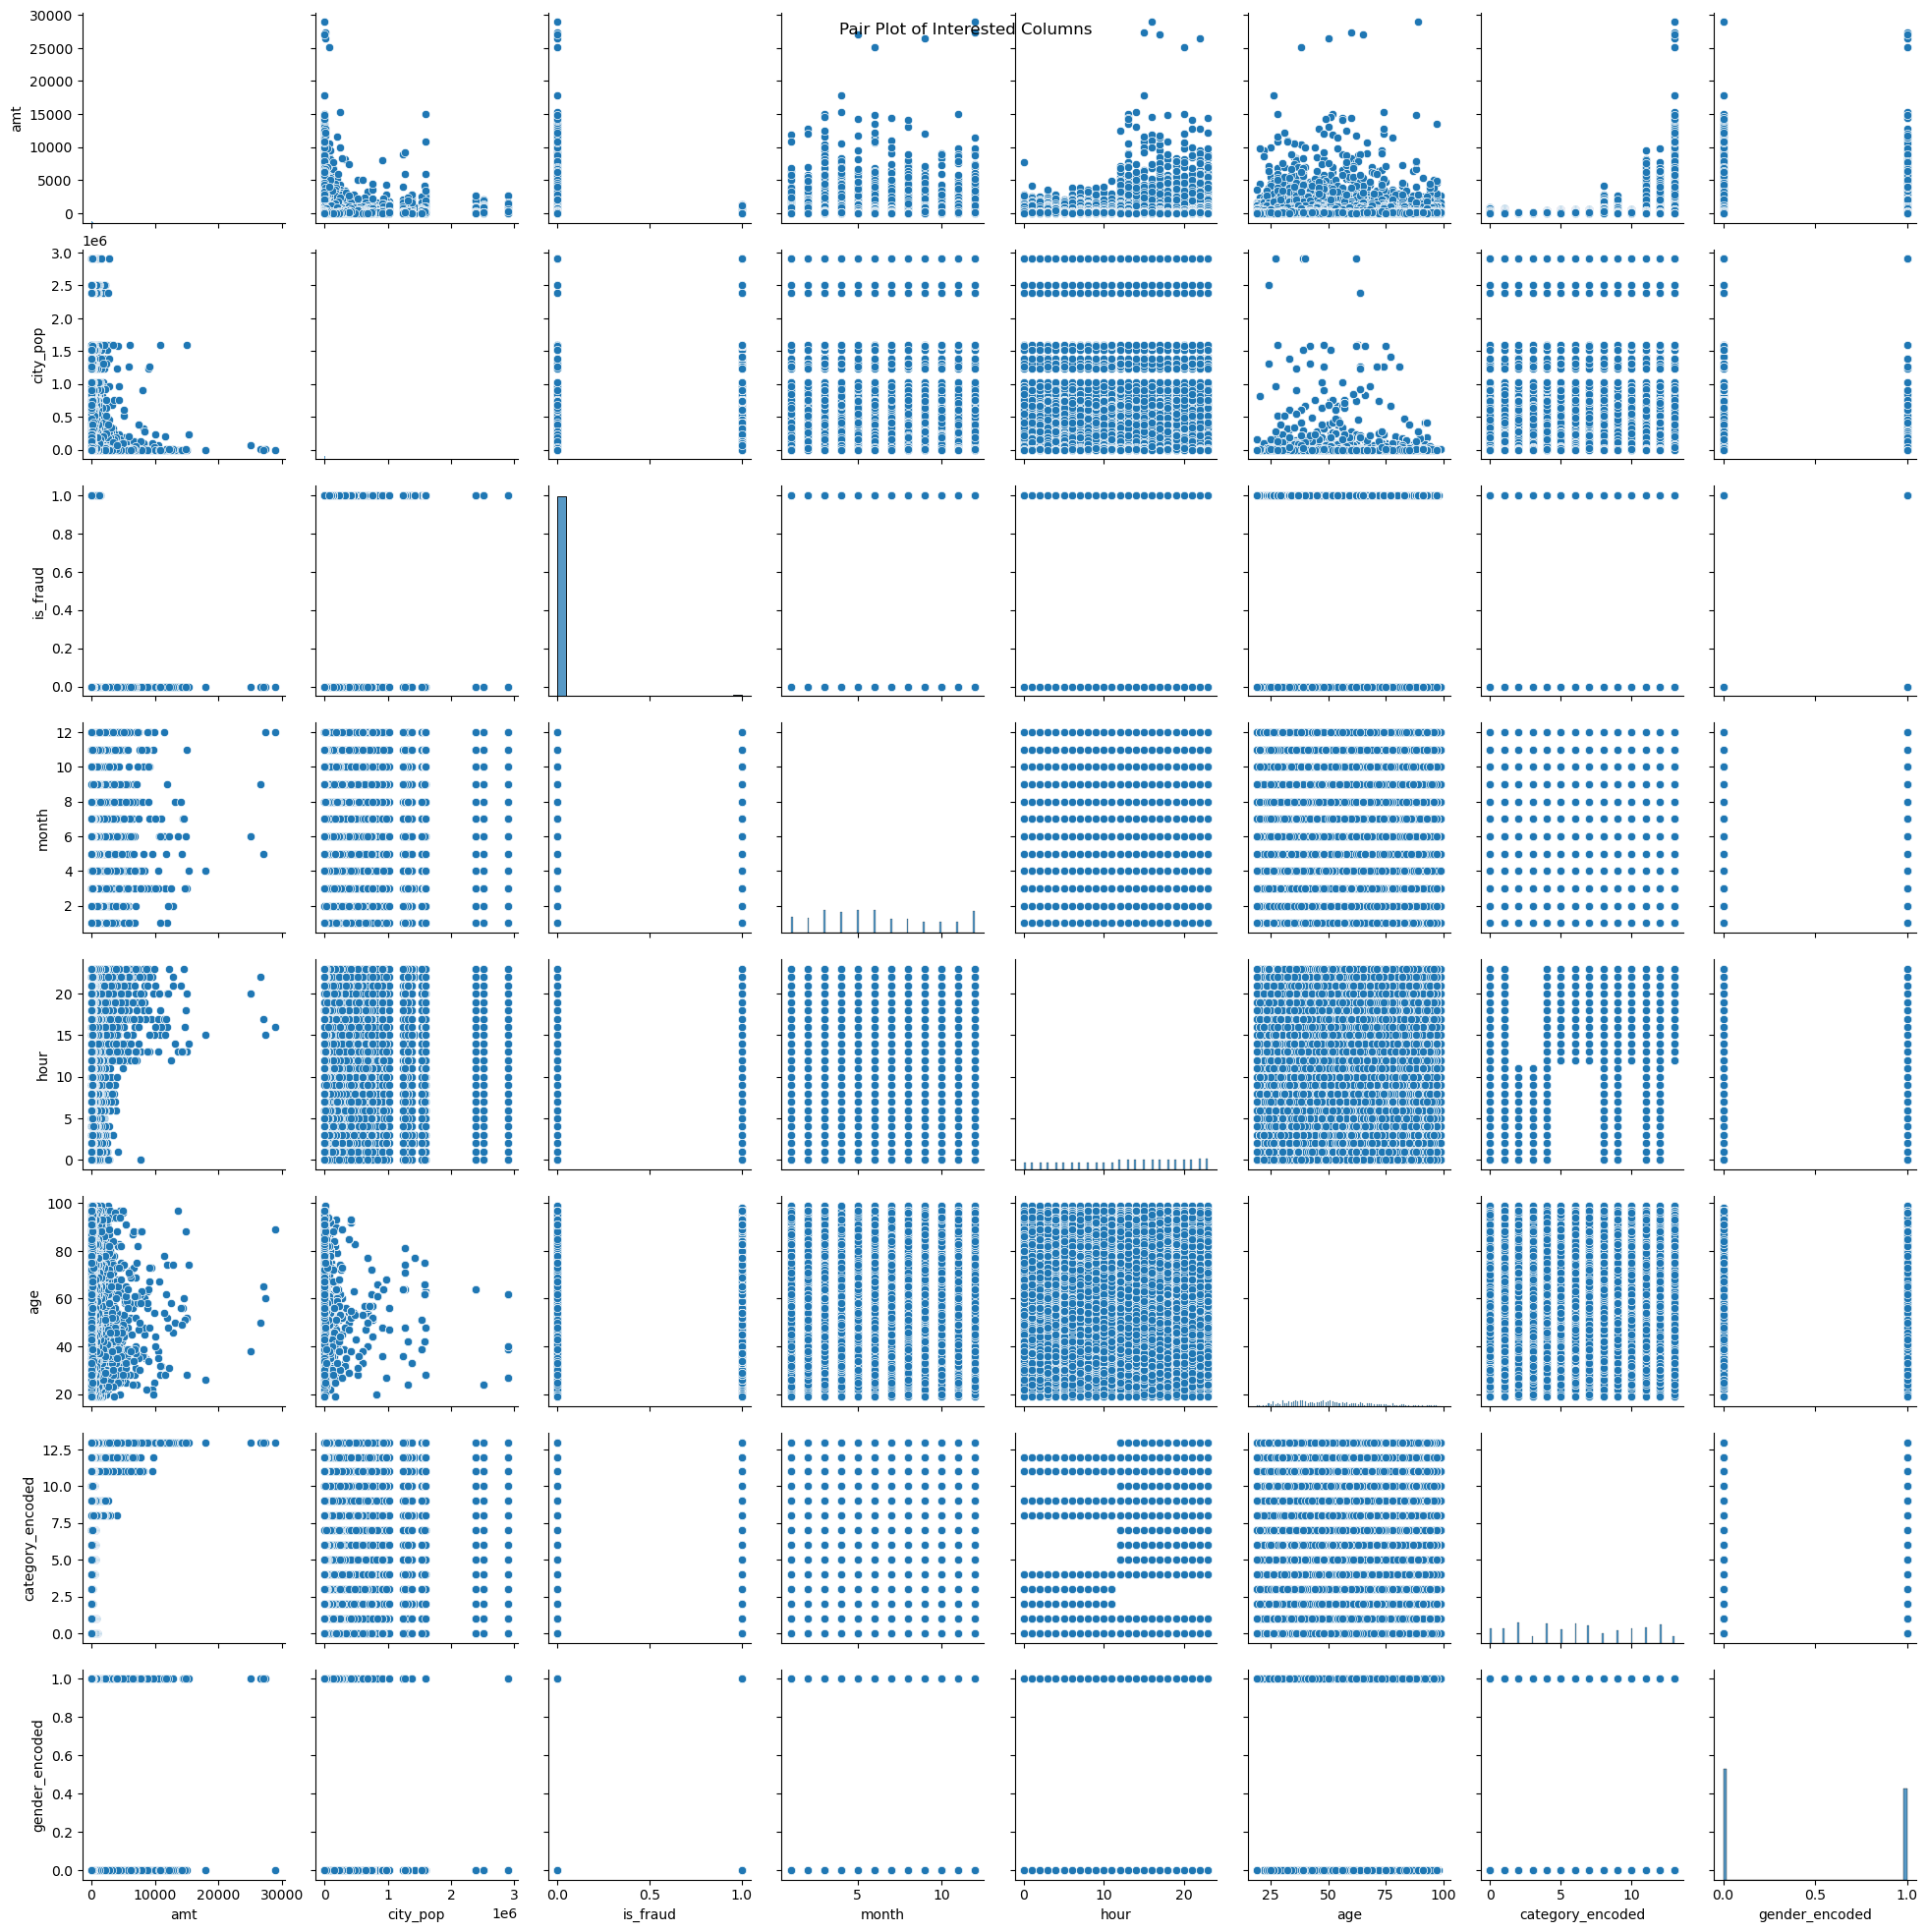

In [29]:
interested_cols = ['amt', 'city_pop', 'is_fraud', 'month', 'hour', 'age', 'category_encoded', 'gender_encoded']

# Create a DataFrame subset with the interested columns
subset_df = onlyNumerical[interested_cols]

# Use seaborn's pairplot with the subset DataFrame
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Interested Columns')
plt.show()

Outlier Analysis

In [30]:
# Calculate quartiles and IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers and create a new DataFrame without outliers
df_no_outliers = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

# Print the number of outliers removed
num_outliers_removed = len(df) - len(df_no_outliers)
print(f'Number of outliers removed: {num_outliers_removed}')

Number of outliers removed: 67290


There are about 67290 outliers which are either above 75th quantile or below 25th quantile.

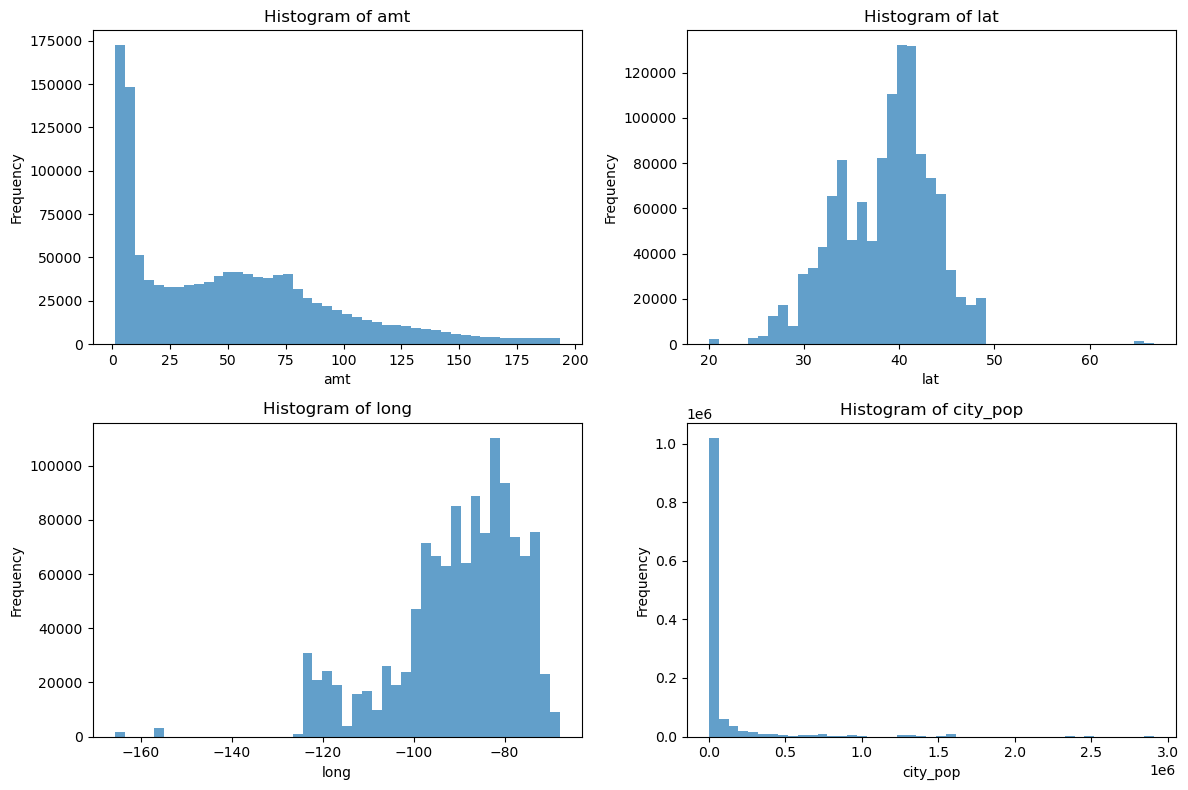

In [31]:
# Numerical columns for histograms
numerical_columns = ['amt', 'lat', 'long', 'city_pop']

# Create a figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axs[i]
    ax.hist(df_no_outliers[col], bins=45, alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()